# Dimensionality Reduction using PCA, TSNE , LDA and Autoencoder





1. Used all technoique to convert 784D to 2D for visualization purpose

Number of constant features: 76
Shape of dataset without constant features: (42000, 708)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.1068 - val_loss: 0.9635
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9444 - val_loss: 0.9108
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8991 - val_loss: 0.8978
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.9006 - val_loss: 0.8919
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8755 - val_loss: 0.8884
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.9005 - val_loss: 0.8859
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8794 - val_loss: 0.8839
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.8808 - val_loss: 0.8824
Epoch 9/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.8660 - val_loss: 0.8810
Epoch 10/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8908 - val_loss: 0.8797
Epoch 11/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8931 - val_loss: 0.8786
Epoch 12/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/ste

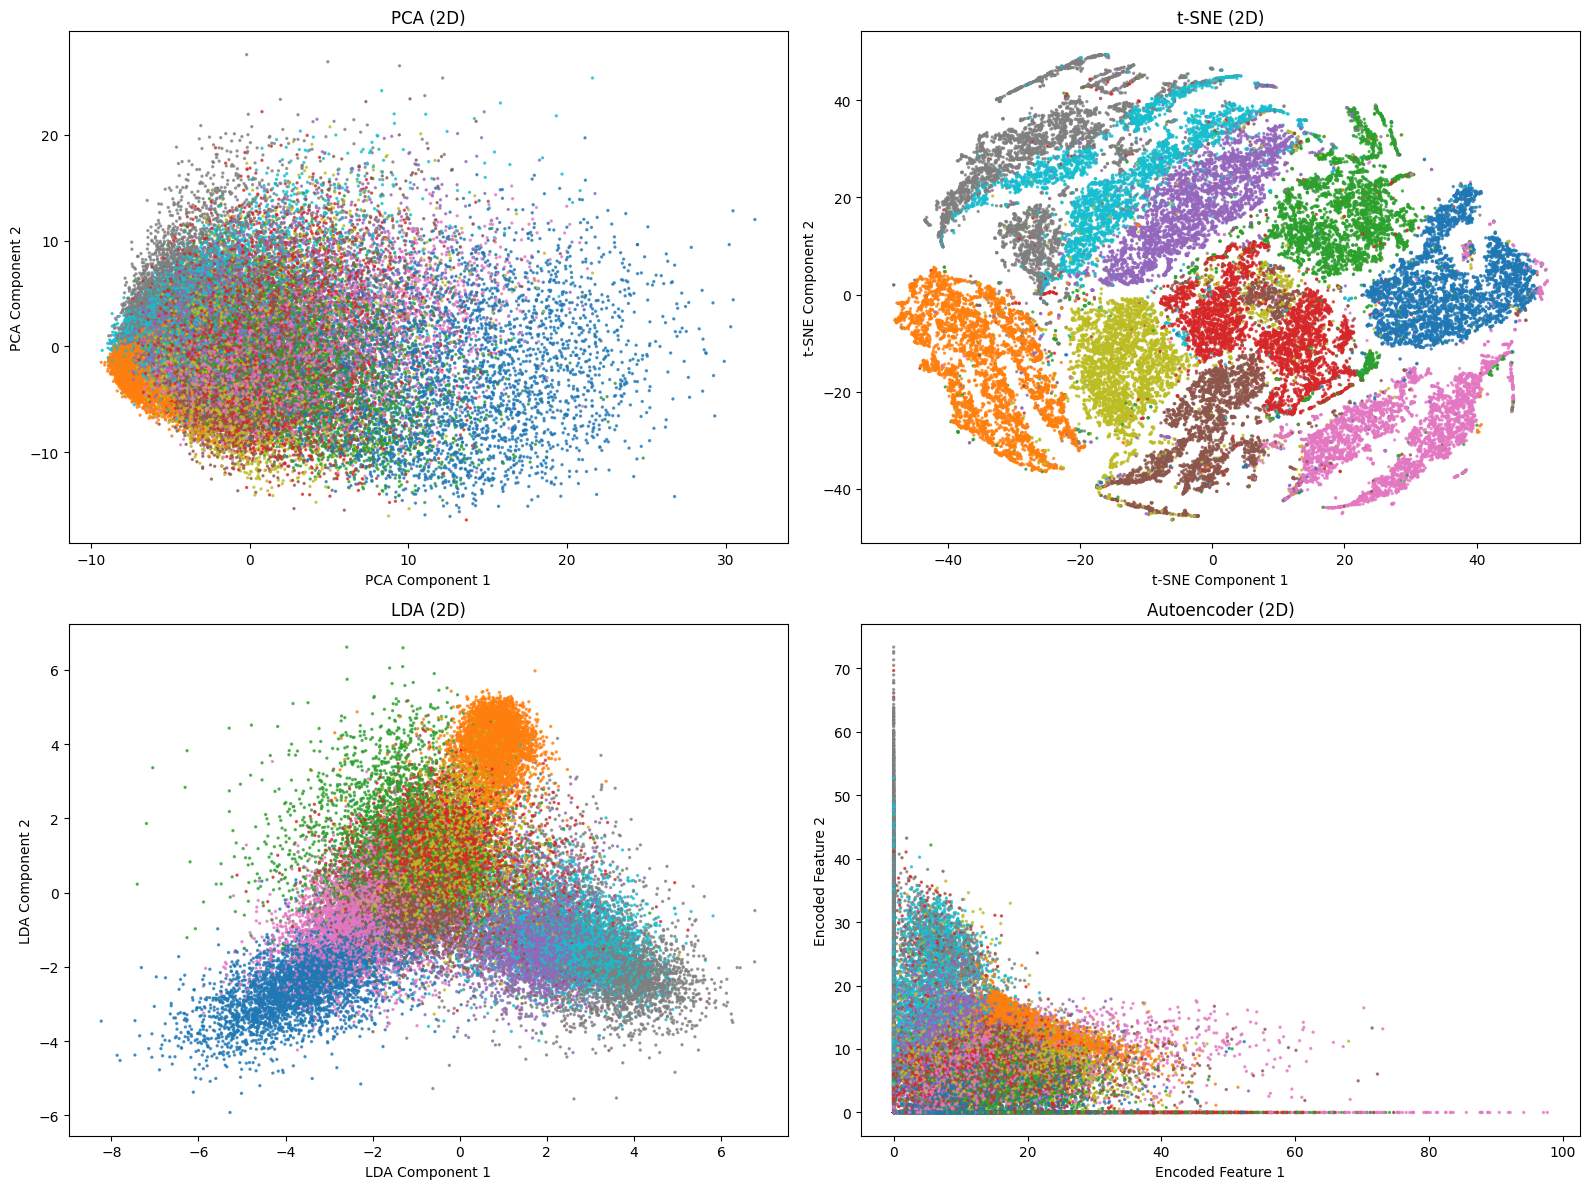

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


mnist = pd.read_csv("/content/train.csv")
X = mnist.drop(columns=['label'])
y = mnist['label']


feature_variance = X.var(axis=0)                                       # Check the variance of each feature (pixel)


constant_features = feature_variance[feature_variance == 0]
print(f"Number of constant features: {len(constant_features)}")        # Find features with zero variance


X_new = X.loc[:, feature_variance != 0]
print(f"Shape of dataset without constant features: {X_new.shape}")     # Remove features with zero variance



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)                                      # Standardize the data

# PCA (2D)
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled)

# t-SNE (2D)
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
X_tsne_2d = tsne_2d.fit_transform(X_scaled)

# LDA (2D)
lda = LDA(n_components=2)
X_lda_2d = lda.fit_transform(X_scaled, y)

# Autoencoder (2D)
input_dim = X_scaled.shape[1]                                            # Number of input features (784 for MNIST)
encoding_dim = 2                                                         # Dimensionality for the encoding layer

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)
X_autoencoder_2d = encoder.predict(X_scaled)

# Plot comparative visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# PCA Plot
axes[0, 0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='tab10', s=2, alpha=0.7)
axes[0, 0].set_title('PCA (2D)')
axes[0, 0].set_xlabel('PCA Component 1')
axes[0, 0].set_ylabel('PCA Component 2')

# t-SNE Plot
axes[0, 1].scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y, cmap='tab10', s=2, alpha=0.7)
axes[0, 1].set_title('t-SNE (2D)')
axes[0, 1].set_xlabel('t-SNE Component 1')
axes[0, 1].set_ylabel('t-SNE Component 2')

# LDA Plot
axes[1, 0].scatter(X_lda_2d[:, 0], X_lda_2d[:, 1], c=y, cmap='tab10', s=2, alpha=0.7)
axes[1, 0].set_title('LDA (2D)')
axes[1, 0].set_xlabel('LDA Component 1')
axes[1, 0].set_ylabel('LDA Component 2')

# Autoencoder Plot
axes[1, 1].scatter(X_autoencoder_2d[:, 0], X_autoencoder_2d[:, 1], c=y, cmap='tab10', s=2, alpha=0.7)
axes[1, 1].set_title('Autoencoder (2D)')
axes[1, 1].set_xlabel('Encoded Feature 1')
axes[1, 1].set_ylabel('Encoded Feature 2')

plt.tight_layout()
plt.show()


# 2. Used all technoique to convert 784D to 3D for visualization purpose

Number of constant features: 76
Shape of dataset without constant features: (42000, 708)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.1006 - val_loss: 0.9115
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.8987 - val_loss: 0.8768
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.8614 - val_loss: 0.8682
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.8481 - val_loss: 0.8640
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.8544 - val_loss: 0.8612
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.8404 - val_loss: 0.8591
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.8493 - val_loss: 0.8573
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8453 - val_loss: 0.8555
Epoch 9/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8558 - val_loss: 0.8542
Epoch 10/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8403 - val_loss: 0.8531
Epoch 11/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.8646 - val_loss: 0.8521
Epoch 12/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/s

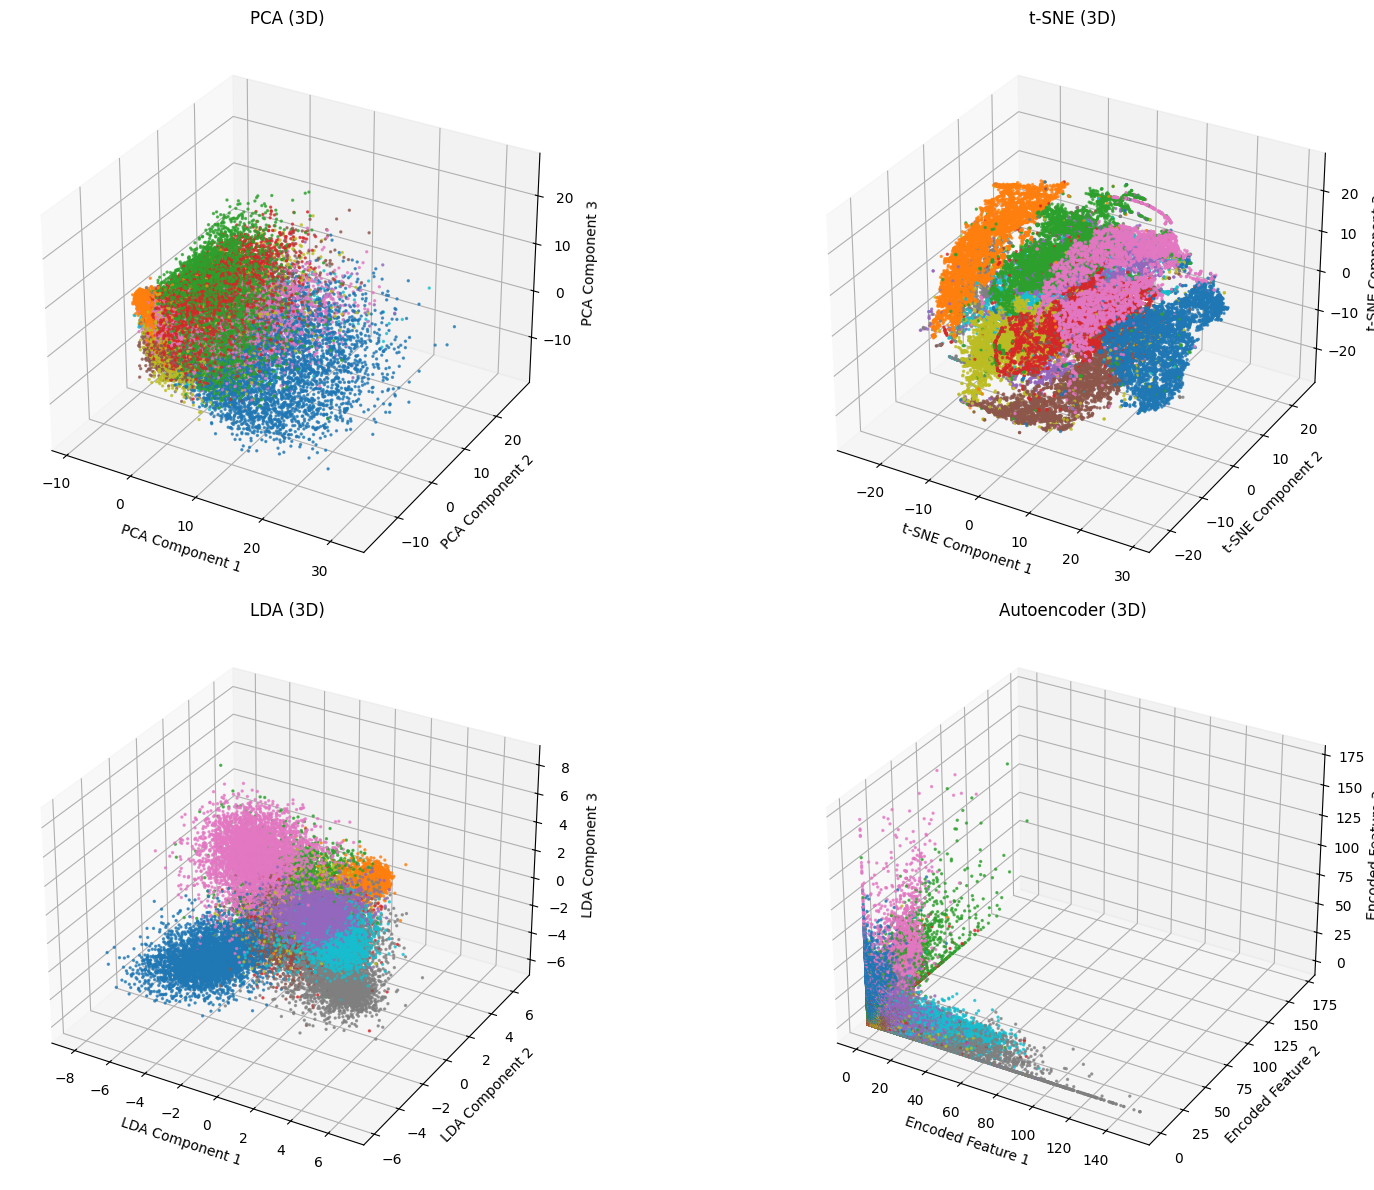

In [ ]:

# PCA (3D)
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

# t-SNE (3D)
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=600)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

# LDA (3D)
lda = LDA(n_components=3)
X_lda_3d = lda.fit_transform(X_scaled, y)

# Autoencoder (3D)
input_dim = X_scaled.shape[1]  # Number of input features (784 for MNIST)
encoding_dim = 3  # Dimensionality for the encoding layer (changed to 3)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)
X_autoencoder_3d = encoder.predict(X_scaled)

# Plot comparative visualizations in 3D
fig = plt.figure(figsize=(18, 12))

# PCA Plot (3D)
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='tab10', s=2, alpha=0.7)
ax1.set_title('PCA (3D)')
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_zlabel('PCA Component 3')

# t-SNE Plot (3D)
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=y, cmap='tab10', s=2, alpha=0.7)
ax2.set_title('t-SNE (3D)')
ax2.set_xlabel('t-SNE Component 1')
ax2.set_ylabel('t-SNE Component 2')
ax2.set_zlabel('t-SNE Component 3')

# LDA Plot (3D)
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(X_lda_3d[:, 0], X_lda_3d[:, 1], X_lda_3d[:, 2], c=y, cmap='tab10', s=2, alpha=0.7)
ax3.set_title('LDA (3D)')
ax3.set_xlabel('LDA Component 1')
ax3.set_ylabel('LDA Component 2')
ax3.set_zlabel('LDA Component 3')

# Autoencoder Plot (3D)
ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(X_autoencoder_3d[:, 0], X_autoencoder_3d[:, 1], X_autoencoder_3d[:, 2], c=y, cmap='tab10', s=2, alpha=0.7)
ax4.set_title('Autoencoder (3D)')
ax4.set_xlabel('Encoded Feature 1')
ax4.set_ylabel('Encoded Feature 2')
ax4.set_zlabel('Encoded Feature 3')

plt.tight_layout()
plt.show()


# 784D to 9D

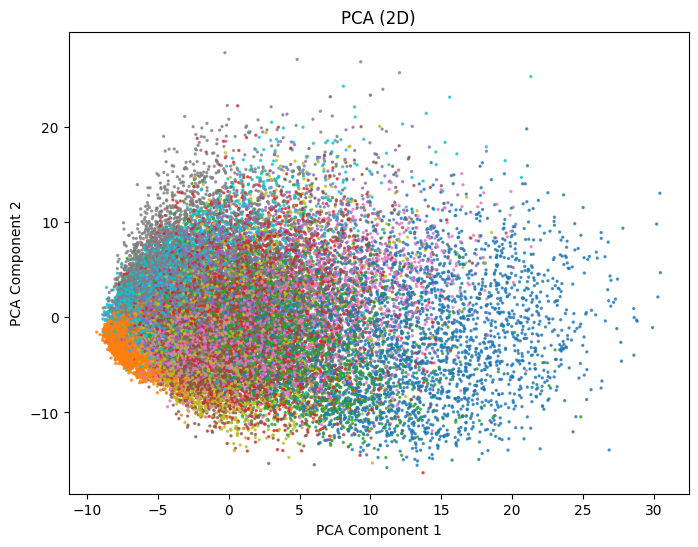

PCA (9D) Classification Accuracy on Validation Data: 0.7830


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


train = pd.read_csv('/content/train.csv')


X_train = train.drop(columns=['label'])            # Separate features and labels for the train dataset
y_train = train['label']


X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


scaler = StandardScaler()                             # Standardize the data (separate for train and validation)
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)

# PCA (9D)
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)


clf_pca = LogisticRegression(max_iter=1000)        # Train a classifier on PCA reduced data
clf_pca.fit(X_train_pca, y_train_split)

y_pred_val = clf_pca.predict(X_val_pca)            # Predict on the validation set


pca_accuracy = accuracy_score(y_val_split, y_pred_val)
print(f"PCA (9D) Classification Accuracy on Validation Data: {pca_accuracy:.4f}")

Number of components: 9


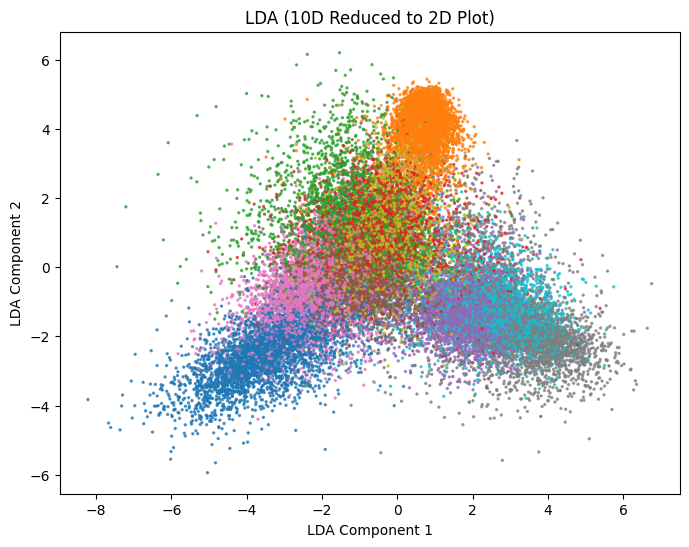

LDA (9D) on reduced data Classification Accuracy on Validation Data: 0.8824


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load the train dataset
train = pd.read_csv('/content/train.csv')

# Separate features and labels for the train dataset
X_train = train.drop(columns=['label'])
y_train = train['label']

# Step 2: Split the training data (80% train, 20% validation)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Standardize the data (separate for train and validation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)

n_components = min(len(np.unique(y_train_split)) - 1, X_train_scaled.shape[1])
print(f'Number of components: {n_components}')

# Step 2: Initialize LDA with correct parameters
lda = LDA(n_components=n_components, solver='svd')  # 'n_components' as keyword argument
X_train_lda = lda.fit_transform(X_train_scaled, y_train_split)
X_val_lda = lda.transform(X_val_scaled)

# Step 4: Train a classifier on LDA reduced data
clf_lda = LogisticRegression(max_iter=1000)
clf_lda.fit(X_train_lda, y_train_split)

# Step 5: Predict on the validation set
y_pred_val_lda = clf_lda.predict(X_val_lda)

# Calculate accuracy for LDA
lda_accuracy = accuracy_score(y_val_split, y_pred_val_lda)
print(f"LDA (9D) on reduced data Classification Accuracy on Validation Data: {lda_accuracy:.4f}")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Step 1: Load the train dataset
train = pd.read_csv('/content/train.csv')

# Separate features and labels for the train dataset
X_train = train.drop(columns=['label'])
y_train = train['label']

# Step 2: Split the training data (80% train, 20% validation)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Standardize the data (separate for train and validation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)

# Step 4: Build Autoencoder Model with 9D reduction
input_dim = X_train_scaled.shape[1]
encoding_dim = 9  # Set the dimension of the reduced feature space to 9

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder Model
autoencoder = Model(input_layer, decoded)

# Encoder Model
encoder = Model(input_layer, encoded)

# Compile and train the Autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=256, validation_data=(X_val_scaled, X_val_scaled), verbose=2)

# Step 5: Use the encoder to transform the data into 9-dimensional space
X_train_autoencoded = encoder.predict(X_train_scaled)
X_val_autoencoded = encoder.predict(X_val_scaled)

# Step 6: Train a classifier on the 9D autoencoded data
clf_autoencoder = LogisticRegression(max_iter=1000)
clf_autoencoder.fit(X_train_autoencoded, y_train_split)

# Step 7: Predict on the validation set
y_pred_val_autoencoder = clf_autoencoder.predict(X_val_autoencoded)

# Calculate accuracy for Autoencoder
autoencoder_accuracy = accuracy_score(y_val_split, y_pred_val_autoencoder)
print(f"Autoencoder Classification Accuracy on Validation Data: {autoencoder_accuracy:.4f}")


Epoch 1/50
132/132 - 4s - 30ms/step - loss: 0.9634 - val_loss: 1.9627
Epoch 2/50
132/132 - 0s - 3ms/step - loss: 0.8214 - val_loss: 1.9020
Epoch 3/50
132/132 - 0s - 2ms/step - loss: 0.7817 - val_loss: 1.8774
Epoch 4/50
132/132 - 0s - 3ms/step - loss: 0.7654 - val_loss: 1.8669
Epoch 5/50
132/132 - 0s - 2ms/step - loss: 0.7577 - val_loss: 1.8609
Epoch 6/50
132/132 - 0s - 2ms/step - loss: 0.7528 - val_loss: 1.8569
Epoch 7/50
132/132 - 0s - 2ms/step - loss: 0.7494 - val_loss: 1.8540
Epoch 8/50
132/132 - 1s - 5ms/step - loss: 0.7468 - val_loss: 1.8519
Epoch 9/50
132/132 - 0s - 2ms/step - loss: 0.7447 - val_loss: 1.8501
Epoch 10/50
132/132 - 0s - 3ms/step - loss: 0.7430 - val_loss: 1.8486
Epoch 11/50
132/132 - 0s - 3ms/step - loss: 0.7415 - val_loss: 1.8472
Epoch 12/50
132/132 - 0s - 4ms/step - loss: 0.7402 - val_loss: 1.8461
Epoch 13/50
132/132 - 1s - 5ms/step - loss: 0.7390 - val_loss: 1.8450
Epoch 14/50
132/132 - 1s - 4ms/step - loss: 0.7380 - val_loss: 1.8440
Epoch 15/50
132/132 - 0s - 4

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Step 1: Load the train dataset
train = pd.read_csv('/content/train.csv')

# Separate features and labels for the train dataset
X_train = train.drop(columns=['label'])
y_train = train['label']

# Step 2: Split the training data (80% train, 20% validation)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Standardize the data (separate for train and validation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)

# Step 4: Apply t-SNE for 2-dimensional reduction (or 9D if needed)
tsne = TSNE(n_components=2, random_state=42)  # You can change n_components to 9 if you want
X_train_tsne = tsne.fit_transform(X_train_scaled)

# t-SNE cannot transform validation data directly, so we skip that part
# You can either fit t-SNE on validation data separately or use another method for the validation data

# Step 5: Train a classifier on the t-SNE reduced data
clf_tsne = LogisticRegression(max_iter=1000)
clf_tsne.fit(X_train_tsne, y_train_split)

# Step 6: Predict on the validation set (you need to apply t-SNE again on the validation set if desired)
# For validation data, if you want to use t-SNE, you can fit t-SNE to validation data too (or use another method like PCA for consistent results)
X_val_tsne = tsne.fit_transform(X_val_scaled)  # Reapply t-SNE on the validation data

# Predict on the transformed validation set
y_pred_val_tsne = clf_tsne.predict(X_val_tsne)

# Calculate accuracy for t-SNE
tsne_accuracy = accuracy_score(y_val_split, y_pred_val_tsne)
print(f"t-SNE Classification Accuracy on Validation Data: {tsne_accuracy:.4f}")


t-SNE Classification Accuracy on Validation Data: 0.0425


In [ ]:
import pandas as pd

# Dictionary to store method names and accuracies
accuracy_results = {}

# Compute and store accuracies for each method
accuracy_results['t-SNE 2D'] = tsne_accuracy

accuracy_results['Autoencoder 9D'] = autoencoder_accuracy
accuracy_results['LDA 9D'] = lda_accuracy
accuracy_results['PCA 9D'] = pca_accuracy
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Method', 'Classification Accuracy'])
print(accuracy_df.sort_values(by=['Classification Accuracy'], ascending=False))



           Method  Classification Accuracy
2          LDA 9D                 0.882381
3          PCA 9D                 0.782976
1  Autoencoder 9D                 0.767143
0        t-SNE 2D                 0.042500


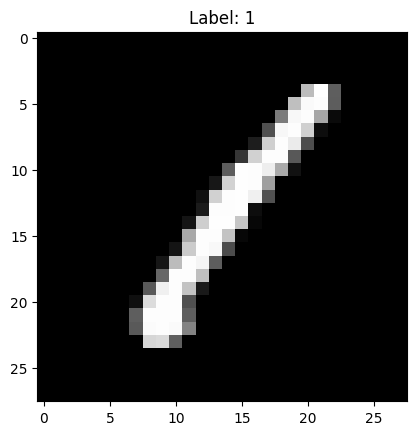

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training data
data = pd.read_csv('train.csv')

# Extract a sample image (first row, excluding the label column)
image_data = data.iloc[0, 1:].values.reshape(28, 28)

# Display the image
plt.imshow(image_data, cmap='gray')
plt.title(f'Label: {data.iloc[0, 0]}')  # Display the label as the title
plt.show()



In [ ]:
import pandas as pd

# Load the train.csv file
train_df = pd.read_csv('train.csv')

print(train_df.shape)

# Check the first few rows to confirm the structure
print(train_df.head())

# Find columns with non-zero values (excluding the 'label' column)
non_zero_counts = (train_df.iloc[:, 1:] != 0).sum().sum()
print(f"Total number of non-zero pixel values: {non_zero_counts}")

# Display the first row that contains a non-zero value in the pixel columns
first_non_zero_row = train_df.iloc[(train_df.iloc[:, 1:] != 0).any(axis=1).idxmax()]
print(first_non_zero_row)


(42000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0      

In [ ]:
import pandas as pd

# Load the train.csv file
train_df = pd.read_csv('train.csv')

# Check the first few rows to confirm the structure
print(train_df.head())

# Find the total number of non-zero pixel values (excluding the 'label' column)
non_zero_counts = (train_df.iloc[:, 1:] != 0).sum().sum()
print(f"Total number of non-zero pixel values: {non_zero_counts}")

# Display the first row that contains a non-zero value in the pixel columns
first_non_zero_row = train_df.iloc[(train_df.iloc[:, 1:] != 0).any(axis=1).idxmax()]
print("First row with non-zero pixel values:")
print(first_non_zero_row)

# Extract non-zero pixel values from the entire DataFrame (excluding 'label' column)
non_zero_values = train_df.iloc[:, 1:][train_df.iloc[:, 1:] != 0].stack().values

# Print the range of non-zero pixel values
print(f"Minimum non-zero pixel value: {non_zero_values.min()}")
print(f"Maximum non-zero pixel value: {non_zero_values.max()}")

# Print a sample of non-zero pixel values
print("Sample of non-zero pixel values:", non_zero_values[:10])


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

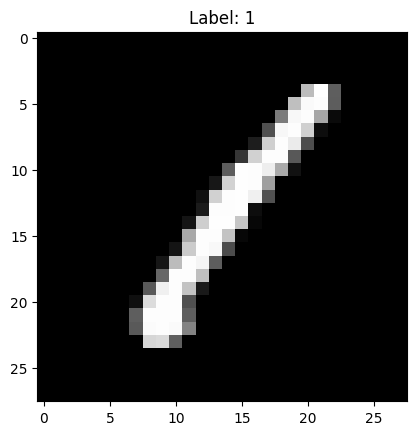

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert a row to a 28x28 array (excluding the label)
image = train_df.iloc[0, 1:].values.reshape(28, 28)

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f'Label: {train_df.iloc[0, 0]}')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load the train dataset
train = pd.read_csv('/content/train.csv')

# Separate features and labels for the train dataset
X_train = train.drop(columns=['label'])
y_train = train['label']

# Step 2: Split the training data (80% train, 20% validation)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Standardize the data (separate for train and validation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)

n_components = min(len(np.unique(y_train_split)) - 1, X_train_scaled.shape[1])
print(f'Number of components: {n_components}')

# Step 2: Initialize LDA with correct parameters
lda = LDA(n_components=n_components, solver='svd')  # 'n_components' as keyword argument
X_train_lda = lda.fit_transform(X_train_scaled, y_train_split)
X_val_lda = lda.transform(X_val_scaled)

# Step 4: Train a classifier on LDA reduced data
clf_lda = LogisticRegression(max_iter=1000)
clf_lda.fit(X_train_lda, y_train_split)

# Step 5: Predict on the validation set
y_pred_val_lda = clf_lda.predict(X_val_lda)

# Calculate accuracy for LDA
lda_accuracy = accuracy_score(y_val_split, y_pred_val_lda)
print(f"LDA (9D) on reduced data Classification Accuracy on Validation Data: {lda_accuracy:.4f}")


# PCA FOR 9D , 50D and 100D with percent of varaince preserve

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


train = pd.read_csv('/content/train.csv')


X_train = train.drop(columns=['label'])            # Separate features and labels for the train dataset
y_train = train['label']


X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


scaler = StandardScaler()                             # Standardize the data (separate for train and validation)
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)

# PCA (50D)
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)


clf_pca = LogisticRegression(max_iter=1000)        # Train a classifier on PCA reduced data
clf_pca.fit(X_train_pca, y_train_split)

y_pred_val = clf_pca.predict(X_val_pca)            # Predict on the validation set


pca_accuracy = accuracy_score(y_val_split, y_pred_val)
print(f"PCA (50D) Classification Accuracy on Validation Data: {pca_accuracy:.4f}")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


train = pd.read_csv('/content/train.csv')


X_train = train.drop(columns=['label'])            # Separate features and labels for the train dataset
y_train = train['label']


X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


scaler = StandardScaler()                             # Standardize the data (separate for train and validation)
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)

# PCA (9D)
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)


clf_pca = LogisticRegression(max_iter=1000)        # Train a classifier on PCA reduced data
clf_pca.fit(X_train_pca, y_train_split)

y_pred_val = clf_pca.predict(X_val_pca)            # Predict on the validation set


pca_accuracy = accuracy_score(y_val_split, y_pred_val)
print(f"PCA (9D) Classification Accuracy on Validation Data: {pca_accuracy:.4f}")

# PCA (50D)
pca_50 = PCA(n_components=50)
X_train_pca_50 = pca_50.fit_transform(X_train_scaled)

# Calculate the cumulative variance for 50 components
explained_variance_50 = np.sum(pca_50.explained_variance_ratio_)
print(f"Variance preserved with 50 components: {explained_variance_50:.4%}")

# PCA (9D)
pca_9 = PCA(n_components=9)
X_train_pca_9 = pca_9.fit_transform(X_train_scaled)

# Calculate the cumulative variance for 9 components
explained_variance_9 = np.sum(pca_9.explained_variance_ratio_)
print(f"Variance preserved with 9 components: {explained_variance_9:.4%}")



# PCA (100D)
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)


clf_pca = LogisticRegression(max_iter=1000)        # Train a classifier on PCA reduced data
clf_pca.fit(X_train_pca, y_train_split)

y_pred_val = clf_pca.predict(X_val_pca)            # Predict on the validation set


pca_accuracy = accuracy_score(y_val_split, y_pred_val)
print(f"PCA (100D) Classification Accuracy on Validation Data: {pca_accuracy:.4f}")



# Calculate the cumulative variance for 9 components
explained_variance_100 = np.sum(pca.explained_variance_ratio_)
print(f"Variance preserved with 100 components: {explained_variance_100:.4%}")



# PCA (200D)
pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)


clf_pca = LogisticRegression(max_iter=1000)        # Train a classifier on PCA reduced data
clf_pca.fit(X_train_pca, y_train_split)

y_pred_val = clf_pca.predict(X_val_pca)            # Predict on the validation set


pca_accuracy = accuracy_score(y_val_split, y_pred_val)
print(f"PCA (200D) Classification Accuracy on Validation Data: {pca_accuracy:.4f}")



# Calculate the cumulative variance for 9 components
explained_variance_100 = np.sum(pca.explained_variance_ratio_)
print(f"Variance preserved with 200 components: {explained_variance_100:.4%}")





PCA (50D) Classification Accuracy on Validation Data: 0.9011
PCA (9D) Classification Accuracy on Validation Data: 0.7830
Variance preserved with 50 components: 56.3588%
Variance preserved with 9 components: 26.8585%
PCA (100D) Classification Accuracy on Validation Data: 0.9146
Variance preserved with 100 components: 72.0968%
PCA (200D) Classification Accuracy on Validation Data: 0.9186
Variance preserved with 200 components: 87.9363%


# AUTOENCODER WITH 9D, 50D, 100D AND 200D


Training Autoencoder with Encoding Dimension: 9D
Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.0362 - val_loss: 1.9438
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.8054 - val_loss: 1.8981
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7946 - val_loss: 1.8791
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7762 - val_loss: 1.8688
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7680 - val_loss: 1.8632
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7473 - val_loss: 1.8596
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7141 - val_loss: 1.8569
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7487 - val_loss: 1.8546
Epoch 9/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7516 - val_loss: 1.8526
Epoch 10/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.7489 - val_loss: 1.8510
Epoch 11/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7381 - val_loss: 1.8495


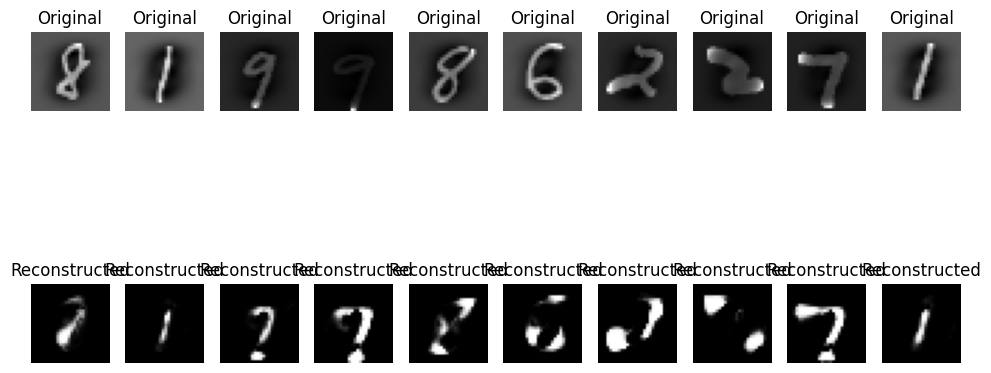


Training Autoencoder with Encoding Dimension: 50D
Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.9706 - val_loss: 1.8498
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.7273 - val_loss: 1.8030
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6832 - val_loss: 1.7823
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6798 - val_loss: 1.7706
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6530 - val_loss: 1.7635
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6543 - val_loss: 1.7583
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6654 - val_loss: 1.7546
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6748 - val_loss: 1.7518
Epoch 9/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.6541 - val_loss: 1.7496
Epoch 10/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6504 - val_loss: 1.7477
Epoch 11/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6401 - val_loss: 1.7

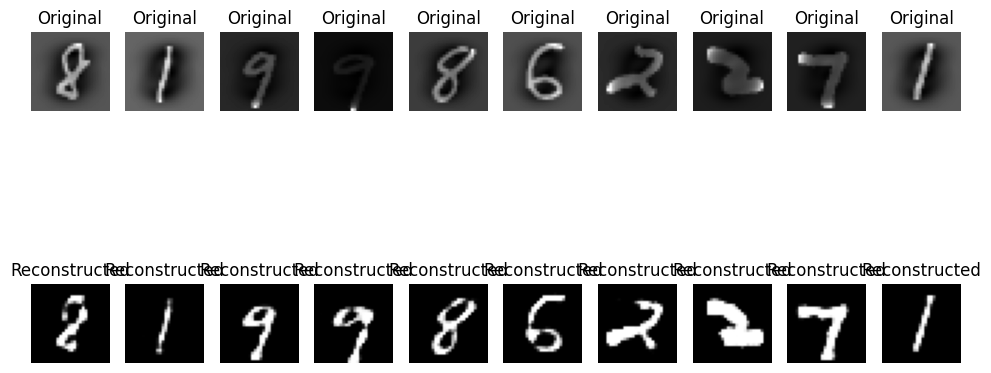


Training Autoencoder with Encoding Dimension: 100D
Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.9026 - val_loss: 1.8167
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.6971 - val_loss: 1.7729
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.6660 - val_loss: 1.7545
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.6493 - val_loss: 1.7451
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.6461 - val_loss: 1.7391
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.6220 - val_loss: 1.7351
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.6130 - val_loss: 1.7323
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.6246 - val_loss: 1.7294
Epoch 9/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.6365 - val_loss: 1.7277
Epoch 10/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.6158 - val_loss: 1.7262
Epoch 11/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.6423 - val_lo

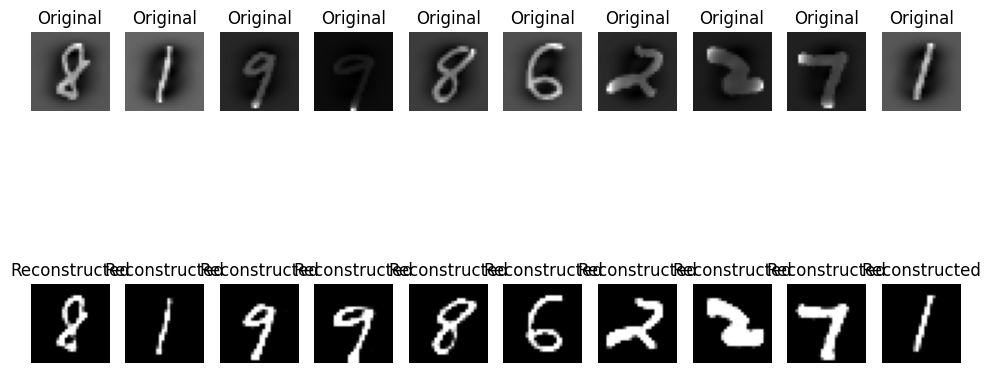


Training Autoencoder with Encoding Dimension: 200D
Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.8666 - val_loss: 1.7844
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.6598 - val_loss: 1.7487
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.6335 - val_loss: 1.7351
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.6268 - val_loss: 1.7285
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.6203 - val_loss: 1.7244
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.5966 - val_loss: 1.7211
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.6060 - val_loss: 1.7192
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.5948 - val_loss: 1.7178
Epoch 9/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.6364 - val_loss: 1.7166
Epoch 10/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.6304 - val_loss: 1.7157
Epoch 11/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.5880 - val_lo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Autoencoder Classification Accuracy on Validation Data: 0.9251
Training Reconstruction Error (MSE): 0.5980
Validation Reconstruction Error (MSE): 1.7066


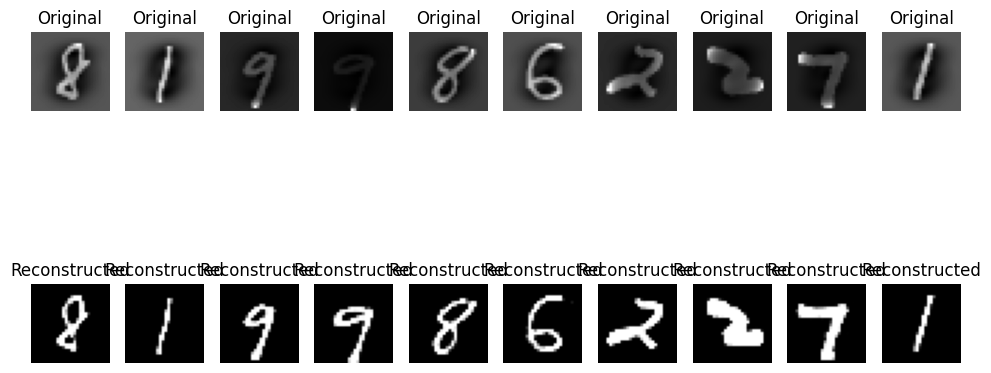


Summary of Results (Accuracy and Reconstruction Errors):
   Encoding Dimension  Accuracy  Train Reconstruction Error (MSE)  \
0                   9  0.761905                          0.721231   
1                  50  0.900595                          0.617557   
2                 100  0.916905                          0.602225   
3                 200  0.925119                          0.598040   

   Validation Reconstruction Error (MSE)  
0                               1.828591  
1                               1.726254  
2                               1.710927  
3                               1.706581  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam

# Load the dataset
train = pd.read_csv('/content/train.csv')

# Separate features and labels
X_train = train.drop(columns=['label'])
y_train = train['label']

# Train-test split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)

# List of encoding dimensions to test
encoding_dims = [9, 50, 100, 200]

# Initialize an empty list to store results
results = []

for encoding_dim in encoding_dims:
    print(f"\nTraining Autoencoder with Encoding Dimension: {encoding_dim}D")

    try:
        # --------- Autoencoder ---------
        input_dim = X_train_scaled.shape[1]  # Number of features

        # Build the autoencoder model
        input_layer = Input(shape=(input_dim,))
        encoded = Dense(encoding_dim, activation='relu')(input_layer)
        decoded = Dense(input_dim, activation='sigmoid')(encoded)

        autoencoder = Model(input_layer, decoded)

        # Compile the autoencoder model
        autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

        # Train the autoencoder model
        autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=256, shuffle=True, validation_data=(X_val_scaled, X_val_scaled))

        # --------- Encoding and Reconstruction ---------
        # Use the encoder part of the autoencoder
        encoder = Model(input_layer, encoded)
        X_train_encoded = encoder.predict(X_train_scaled)
        X_val_encoded = encoder.predict(X_val_scaled)

        # --------- Evaluation ---------
        # Use encoded representations for classification
        clf_autoencoder = LogisticRegression(max_iter=1000)
        clf_autoencoder.fit(X_train_encoded, y_train_split)

        # Predict and evaluate on the validation data
        y_pred_val_autoencoder = clf_autoencoder.predict(X_val_encoded)
        autoencoder_accuracy = accuracy_score(y_val_split, y_pred_val_autoencoder)

        # --------- Reconstruction Error ---------
        # Predict the reconstructed data
        X_train_reconstructed = autoencoder.predict(X_train_scaled)
        X_val_reconstructed = autoencoder.predict(X_val_scaled)

        # Calculate mean squared error (MSE) for reconstruction error
        train_reconstruction_error = mean_squared_error(X_train_scaled, X_train_reconstructed)
        val_reconstruction_error = mean_squared_error(X_val_scaled, X_val_reconstructed)

        # Store results in the list
        results.append({
            'Encoding Dimension': encoding_dim,
            'Accuracy': autoencoder_accuracy,
            'Train Reconstruction Error (MSE)': train_reconstruction_error,
            'Validation Reconstruction Error (MSE)': val_reconstruction_error
        })

        print(f"Autoencoder Classification Accuracy on Validation Data: {autoencoder_accuracy:.4f}")
        print(f"Training Reconstruction Error (MSE): {train_reconstruction_error:.4f}")
        print(f"Validation Reconstruction Error (MSE): {val_reconstruction_error:.4f}")

        # --------- Visualize Reconstruction Error ---------
        # Plot reconstruction error for a sample of the data
        sample_size = 10  # Number of samples to plot
        plt.figure(figsize=(12, 6))
        for i in range(sample_size):
            plt.subplot(2, sample_size, i + 1)
            plt.imshow(X_val_scaled[i].reshape(28, 28), cmap='gray')
            plt.title("Original")
            plt.axis('off')

            plt.subplot(2, sample_size, sample_size + i + 1)
            plt.imshow(X_val_reconstructed[i].reshape(28, 28), cmap='gray')
            plt.title("Reconstructed")
            plt.axis('off')

        plt.show()

    except Exception as e:
        print(f"Error occurred for encoding dimension {encoding_dim}: {e}")

# Convert results to a DataFrame and display it as a table
results_df = pd.DataFrame(results)
print("\nSummary of Results (Accuracy and Reconstruction Errors):")
print(results_df)
